In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [5]:
df['sex']=df['sex'].astype('object')
df['cp']=df['cp'].astype('object')
df['fbs']=df['fbs'].astype('object')
df['restecg']=df['restecg'].astype('object')
df['exang']=df['exang'].astype('object')
df['slope']=df['slope'].astype('object')
df['ca']=df['ca'].astype('object')
df['thal']=df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [6]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target']=df.target.replace({1:"Disease", 0:"No Disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina",1: "atypical_angina",2:"non-anginal pain",3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1:"flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect",3:"normal"})


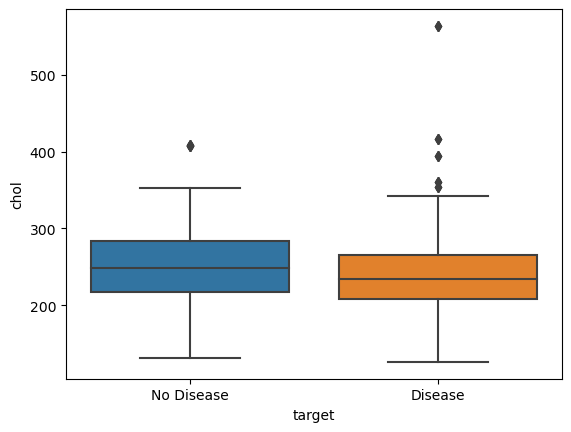

In [12]:
bxplt=sns.boxplot(x=df.target,y=df.chol)
plt.show()

<Axes: xlabel='target', ylabel='oldpeak'>

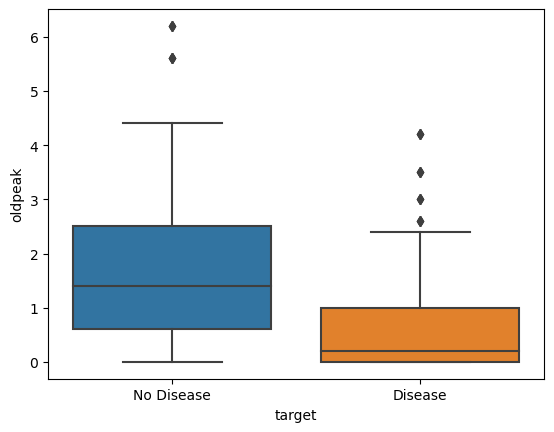

In [13]:
sns.boxplot(x='target', y='oldpeak', data=df)

In [14]:
continuous_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
def outliers(df_out, drop=False):
    for each_feature in df_out.columns:
        feature_data=df_out[each_feature]
        Q1=np.percentile(feature_data, 25.)
        Q3=np.percentile(feature_data, 75.)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outliers=feature_data[~((feature_data>=Q1-outlier_step) & (feature_data<=Q3+outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace=True, errors='ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continuous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 30
For the feature chol, No of Outliers is 16
For the feature thalach, No of Outliers is 4
For the feature oldpeak, No of Outliers is 7


In [15]:
outliers(df[continuous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [16]:
duplicated=df.duplicated().sum()
duplicated

683

In [17]:
if duplicated:
    print("Duplicated rows :{}".format(duplicated))
else:
    print("No duplicates")

Duplicated rows :683


In [18]:
duplicates=df[df.duplicated(keep=False)]
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No Disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No Disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No Disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No Disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No Disease


In [19]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No Disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No Disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No Disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No Disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No Disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No Disease


In [20]:
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No Disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No Disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No Disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No Disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No Disease


In [21]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No Disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No Disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No Disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No Disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No Disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No Disease


In [22]:
dataset1="student.csv"
dataset2="mark.csv"

In [23]:
df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)

In [24]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [25]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [26]:
df = pd.merge(df1, df2, on = 'Student_id')
df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


In [27]:
url='heart.csv'
df=pd.read_csv(url)

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
url="data.csv"
ddf=pd.read_csv(url,encoding='cp1252')

/var/folders/dh/8yr95nx513bf7h0cpwgm30jw0000gn/T/ipykernel_67319/3045655255.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ddf=pd.read_csv(url,encoding='cp1252')


In [31]:
ddf

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ddf=ddf.drop(['stn_code','agency','sampling_date','location_monitoring_station'], axis = 1)

In [33]:
ddf=ddf.dropna(subset=['date']) # dropping rows where no date is available

In [34]:
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ddf[COLS] = imputer.fit_transform(ddf[COLS])

In [35]:
ddf[COLS]

,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,108.833091,220.78348,40.791467
1,3.1,7.0,108.833091,220.78348,40.791467
2,6.2,28.5,108.833091,220.78348,40.791467
3,6.3,14.7,108.833091,220.78348,40.791467
4,4.7,7.5,108.833091,220.78348,40.791467
...,...,...,...,...,...
435734,20.0,44.0,148.000000,220.78348,40.791467
435735,17.0,44.0,131.000000,220.78348,40.791467
435736,18.0,45.0,140.000000,220.78348,40.791467
435737,22.0,50.0,143.000000,220.78348,40.791467


In [36]:
ddf['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [37]:
ddf['type']

0         Residential, Rural and other Areas
1                            Industrial Area
2         Residential, Rural and other Areas
3         Residential, Rural and other Areas
4                            Industrial Area
                         ...                
435734                                 RIRUO
435735                                 RIRUO
435736                                 RIRUO
435737                                 RIRUO
435738                                 RIRUO
Name: type, Length: 435735, dtype: object

In [38]:
ddf['state'].value_counts()

Maharashtra             60382
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19278
Karnataka               17118
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikkim    

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
ddf["state"]=labelencoder.fit_transform(ddf["state"])
ddf.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,0,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.833091,220.78348,40.791467,1990-02-01
1,0,Hyderabad,Industrial Area,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01
2,0,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.833091,220.78348,40.791467,1990-02-01
3,0,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.833091,220.78348,40.791467,1990-03-01
4,0,Hyderabad,Industrial Area,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01


In [40]:
dfAndhra=ddf[(ddf['state']==0)]
dfAndhra

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,0,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.833091,220.78348,40.791467,1990-02-01
1,0,Hyderabad,Industrial Area,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01
2,0,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.833091,220.78348,40.791467,1990-02-01
3,0,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.833091,220.78348,40.791467,1990-03-01
4,0,Hyderabad,Industrial Area,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...
26363,0,Rajahmundry,Industrial Area,7.0,13.0,71.000000,220.78348,40.791467,2015-12-13
26364,0,Rajahmundry,Industrial Area,7.0,18.0,77.000000,220.78348,40.791467,2015-12-16
26365,0,Rajahmundry,Industrial Area,8.0,23.0,64.000000,220.78348,40.791467,2015-12-19
26366,0,Rajahmundry,Industrial Area,7.0,19.0,61.000000,220.78348,40.791467,2015-12-22


In [41]:
dfAndhra['location'].value_counts()

Hyderabad         7764
Visakhapatnam     7108
Vijayawada        2093
Chittoor          1003
Tirupati           986
Kurnool            857
Patancheru         698
Guntur             629
Nalgonda           618
Ramagundam         554
Nellore            408
Khammam            385
Warangal           336
Ananthapur         324
Ongole             317
Kadapa             316
Srikakulam         315
Rajahmundry        311
Eluru              300
Vishakhapatnam     297
Kakinada           288
Vizianagaram       282
Sangareddy          85
Karimnagar          67
Nizamabad           27
Name: location, dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False,handle_unknown='error',drop='first')
pd.DataFrame(onehotencoder.fit_transform(dfAndhra[["location"]]))

/Users/aumkarbhamangol/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df['ca'].unique()

array([2, 0, 1, 3, 4])

In [44]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [45]:
df.loc[df['ca']==4,'ca']=np.NaN

In [46]:
df['thal'].nunique()

4

In [47]:
df['thal'].unique()

array([3, 2, 1, 0])

In [48]:
df[df['thal']==3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,58,1,0,128,216,0,0,131,1,2.2,1,3.0,3,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2.0,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0.0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3,0


In [49]:
df.loc[df['thal']==3,'thal']=np.NaN

In [50]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca           18
thal        410
target        0
dtype: int64

In [51]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
X = df.drop('target', axis=1)

In [54]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,2.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,2.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,2.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,2.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0


In [55]:
X.shape

(1025, 13)

In [56]:
y = df['target']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [57]:
y.shape

(1025,)

In [58]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [60]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (820, 13)
X_test :  (205, 13)
y_train :  (820,)
y_test :  (205,)


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]
